### D208 Performance Assessment_NBM2_Task_1
   
### Multiple Regression for Predictive Modeling
   
  


#### Id No.: 010756950 
#### Mentor: Eric Straw
#### Date: 01/10/2023

## Part I: Research Question

### A1. Research Question:
How much data in GB will a customer use yearly?

### A2. Objectives and Goals:
The goals of the data analysis is to predict how much GBs of data will a customer use yearly. This will provide the company to make a future decision whether to increase the bandwidth, provide unlimited services or deacrease the bandwidth of the customer.

## Part II: Method Justification

### B1. Summary of Assumptions:
Multiple regression model include following assumptions: 

   - There is a linear relationship between the dependent variable and the independent variables. scatterplots can show whether there is a linear relationship or not.

   - The independent variables are not too highly correlated with each other

   - Observations are selected independently and randomly from the population

   - Residuals should be normally distributed with a mean of zero

   - Explanatory power should increase with an increase in variables





### B2. Tool Benefits:
Python will be used to support the various phases of the analysis. Python can handle large dataset easier. It has large libraries that expand its visualization capabilities to do statistical analysis. It also allows the user to implement code solutions, manipulate the data, and create visual representations. 

### B3. Appropriate Technique:
Multiple regression is an appropriate technique to analyze the research question because it uses two or more independent (explanatory) variables to predict the value of  dependent (response) variable. Here our dependent variable is Bandwidth_GB_Year which is a continuous variable. There are many independent variable like job, gender, children, age, income etc which helps to predict how much data a customer will use in the given year. It helps to find whether they have positive or negative relationship between the dependent variables and how it effect the company to make appropriate decisions.


## Part III: Data Preparation

### C1. Data Goals:
My data preparation and data manipulation goals will include:
  - Read the data set into Python using Pandas read_csv command.
  -	Evaluate the data structure to gain a better understanding of the variables and data types.
  - Name the data set as "df_churn".
  - Rename the misleading variables.	
  - Check for the duplicate data using .duplicated() function and check for the null values using isnull() function.
  - Replace the missing values with measures of central tendency (mean, median, mode) using imputation method.
  - Check for the outliers using histogram or boxplot.
  -	Summaries of univariate and bivariate statistics.

### C2. Summary Statistics:
   - After the data set is imported into python, read the data set using pandas read_csv command, the output shows that the dateset consists of 50 original columns and 10,000 records.
   - Columns such as User ID, Caseorder, Customer_id, Interaction, UID, City, State, County, Zip, Lat, Lng, Population, Area, TimeZone, Job, Marial, and PaymentMethod were removed from the dataframe.
   - Binary categorial variables "Yes/No" were encoded to 1/0 as well as the ordinal variables being converted into numeric.
   - The dependent variable Bandwidth_GB_Year is most relevant in decision making which will be the continuous target variable
   - “Children, Age, Income, Outage_sec_perweek, Email, Contacts, Yearly_equip_failure, Tenure, MonthlyCharge, Gender, Contract, InternetService" is the continuous predictor variables.
   - “Churn, Techie, Port_modem, Tablet, Phone, Multiple, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies" is the categorical predictor variables.
   - The discrete ordinal variables (These variables are the survey questions provided using a rating system of 1 to 8 (1 = most important, 8 = least important)
   - Now the dataset appeared to be cleaned leaving no null values or missing data.
   - Boxplot and histogram were created to check for outliers and normal distribution.
   - Histograms for "Bandwidth_GB_Year" & "Tenure" displayed a bimodal distributions, which also showed linear relationship in a scatterplot.
   - The average age of customer is 53 years with standard deviation 20.70, has 2 children with standard deviation 2 and income of 39806.93 dollar with  standard  deviation 28199.92,  10 second per week outage, has less than one yearly equipment failures, and has a monthly charge of 172.53 dollar and uses 3392.34 gigabytes of data per year.

###  C3. Steps to Prepare Data:
- Import dataset to Python dataframe.
- Read dataset using Pandas pd.read_csv command.
- Rename ambiguous variable naming.
- Get a description, structure and data types of the dataframe.
- Identify missing data or NaN and impute the missing data with the appropriate measures of central tendency (mean, median, mode).
- View summary statistics.
- Drop less meaningful columns from dataframe.
- Identify outilers with boxplot and histogram. 
- Create dummy variables in order to encode categorical, yes/no data points into 1/0 numerical values.
- View univariate & bivariate visualizations.
- Finally, the prepared dataset will be extracted & provided as "prepared_churn.csv"


In [96]:
# Standard data science imports
import numpy as np
import pandas as pd

# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Statistics packages
import statsmodels.api as sm
import statistics
from scipy import stats

# Scikit-learn
import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

# Ignore Warning Code
import warnings
warnings.filterwarnings('ignore')

In [97]:
# Load data set into Pandas dataframe
df_churn = pd.read_csv('churn_clean.csv')

# Rename last 8 survey columns for better description of variables
df_churn.rename(columns = {'Item1':'TimelyResponse',
'Item2':'Fixes',
'Item3':'Replacements',
'Item4':'Reliability',
'Item5':'Options',
'Item6':'Respectfulness',
'Item7':'Courteous',
'Item8':'Listening'},
inplace=True)

In [98]:
df_churn

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,TimelyResponse,Fixes,Replacements,Reliability,Options,Respectfulness,Courteous,Listening
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M324793,45deb5a2-ae04-4518-bf0b-c82db8dbe4a4,9499fb4de537af195d16d046b79fd20a,Mount Holly,VT,Rutland,5758,43.43391,-72.78734,...,159.979400,6511.252601,3,2,3,3,4,3,2,3
9996,9997,D861732,6e96b921-0c09-4993-bbda-a1ac6411061a,c09a841117fa81b5c8e19afec2760104,Clarksville,TN,Montgomery,37042,36.56907,-87.41694,...,207.481100,5695.951810,4,5,5,4,4,5,2,5
9997,9998,I243405,e8307ddf-9a01-4fff-bc59-4742e03fd24f,9c41f212d1e04dca84445019bbc9b41c,Mobeetie,TX,Wheeler,79061,35.52039,-100.44180,...,169.974100,4159.305799,4,4,4,4,4,4,4,5
9998,9999,I641617,3775ccfc-0052-4107-81ae-9657f81ecdf3,3e1f269b40c235a1038863ecf6b7a0df,Carrollton,GA,Carroll,30117,33.58016,-85.13241,...,252.624000,6468.456752,4,4,6,4,3,3,5,4


In [99]:
#list column names
df_churn.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService',
       'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'TimelyResponse', 'Fixes', 'Replacements',
       'Reliability', 'Options', 'Respectfulness', 'Courteous', 'Listening'],
      dtype='object')

In [100]:
#Display the summary of the dataframe
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [101]:
# Display the dimension of dataframe
df_churn.shape

(10000, 50)

In [102]:
#Display descriptive statistics for each column.
df_churn.describe() 

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,...,MonthlyCharge,Bandwidth_GB_Year,TimelyResponse,Fixes,Replacements,Reliability,Options,Respectfulness,Courteous,Listening
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,49153.319600,38.757567,-90.782536,9756.562400,2.0877,53.078400,39806.926771,10.001848,12.016000,...,172.624816,3392.341550,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2886.89568,27532.196108,5.437389,15.156142,14432.698671,2.1472,20.698882,28199.916702,2.976019,3.025898,...,42.943094,2185.294852,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,1.00000,601.000000,17.966120,-171.688150,0.000000,0.0000,18.000000,348.670000,0.099747,1.000000,...,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,26292.500000,35.341828,-97.082812,738.000000,0.0000,35.000000,19224.717500,8.018214,10.000000,...,139.979239,1236.470827,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,48869.500000,39.395800,-87.918800,2910.500000,1.0000,53.000000,33170.605000,10.018560,12.000000,...,167.484700,3279.536903,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,7500.25000,71866.500000,42.106908,-80.088745,13168.000000,3.0000,71.000000,53246.170000,11.969485,14.000000,...,200.734725,5586.141370,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.640660,-65.667850,111850.000000,10.0000,89.000000,258900.700000,21.207230,23.000000,...,290.160419,7158.981530,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


In [103]:
#Drop the less meaningful column 'Customer_id','Interaction', 'UID','CaseOrder','Zip','Lat', 'Lng', 'City','State','County','Zip','Population','Area', 'TimeZone', 'Job', 'Marital','PaymentMethod'.

df_churn = df_churn.drop(columns=['CaseOrder', 'Customer_id', 'Interaction','UID', 'City',
                                  'State', 'County', 'Zip', 'Lat', 'Lng','Population','Area', 
                                  'TimeZone', 'Job', 'Marital','PaymentMethod'])


In [104]:
# Display the dimension of dataframe
df_churn.shape

(10000, 34)

In [105]:
#Display descriptive statistics for each column.
df_churn.describe() 

,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,TimelyResponse,Fixes,Replacements,Reliability,Options,Respectfulness,Courteous,Listening
count,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.0877,53.078400,39806.926771,10.001848,12.016000,0.994200,0.398000,34.526188,172.624816,3392.341550,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2.1472,20.698882,28199.916702,2.976019,3.025898,0.988466,0.635953,26.443063,42.943094,2185.294852,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,0.0000,18.000000,348.670000,0.099747,1.000000,0.000000,0.000000,1.000259,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.0000,35.000000,19224.717500,8.018214,10.000000,0.000000,0.000000,7.917694,139.979239,1236.470827,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,1.0000,53.000000,33170.605000,10.018560,12.000000,1.000000,0.000000,35.430507,167.484700,3279.536903,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,3.0000,71.000000,53246.170000,11.969485,14.000000,2.000000,1.000000,61.479795,200.734725,5586.141370,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10.0000,89.000000,258900.700000,21.207230,23.000000,7.000000,6.000000,71.999280,290.160419,7158.981530,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


In [106]:
# Display the duplicate data.
df_churn.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [107]:
# count the duplicate data
df_churn.duplicated().value_counts()

False    10000
dtype: int64

In [108]:
# Display the number of null values
df_churn.isnull().sum()

Children                0
Age                     0
Income                  0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
Tenure                  0
MonthlyCharge           0
Bandwidth_GB_Year       0
TimelyResponse          0
Fixes                   0
Replacements            0
Reliability             0
Options                 0
Respectfulness          0
Courteous               0
Listening               0
dtype: int64

In [109]:
# Create dummy variables in order to encode categorical, yes/no data points into 1/0 numerical values.
df_churn['DummyGender'] = [1 if v == 'Male' else 0 for v in df_churn['Gender']]
df_churn['DummyChurn'] = [1 if v == 'Yes' else 0 for v in df_churn['Churn']]
df_churn['DummyTechie'] = [1 if v == 'Yes' else 0 for v in df_churn['Techie']]
df_churn['DummyContract'] = [1 if v == 'Two Year' else 0 for v in df_churn['Contract']]
df_churn['DummyPort_modem'] = [1 if v == 'Yes' else 0 for v in df_churn['Port_modem']]
df_churn['DummyTablet'] = [1 if v == 'Yes' else 0 for v in df_churn['Tablet']]
df_churn['DummyInternetService'] = [1 if v == 'Fiber Optic' else 0 for v in df_churn['InternetService']]
df_churn['DummyPhone'] = [1 if v == 'Yes' else 0 for v in df_churn['Phone']]
df_churn['DummyMultiple'] = [1 if v == 'Yes' else 0 for v in df_churn['Multiple']]
df_churn['DummyOnlineSecurity'] = [1 if v == 'Yes' else 0 for v in df_churn['OnlineSecurity']]
df_churn['DummyOnlineBackup'] = [1 if v == 'Yes' else 0 for v in df_churn['OnlineBackup']]
df_churn['DummyDeviceProtection'] = [1 if v == 'Yes' else 0 for v in df_churn['DeviceProtection']]
df_churn['DummyTechSupport'] = [1 if v == 'Yes' else 0 for v in df_churn['TechSupport']]
df_churn['DummyStreamingTV'] = [1 if v == 'Yes' else 0 for v in df_churn['StreamingTV']]
df_churn['StreamingMovies'] = [1 if v == 'Yes' else 0 for v in df_churn['StreamingMovies']]
df_churn['DummyPaperlessBilling'] = [1 if v == 'Yes' else 0 for v in df_churn['PaperlessBilling']]


In [110]:
# Drop original categorical features from dataframe
df_churn = df_churn.drop(columns=['Gender', 'Churn', 'Techie', 'Contract','Port_modem', 'Tablet','InternetService', 
                                'Phone', 'Multiple','OnlineSecurity','OnlineBackup', 'DeviceProtection','TechSupport',
                                'StreamingTV', 'StreamingMovies','PaperlessBilling'])

In [111]:
#Display descriptive statistics for each column.
df_churn.describe()

,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,...,DummyTablet,DummyInternetService,DummyPhone,DummyMultiple,DummyOnlineSecurity,DummyOnlineBackup,DummyDeviceProtection,DummyTechSupport,DummyStreamingTV,DummyPaperlessBilling
count,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.0877,53.078400,39806.926771,10.001848,12.016000,0.994200,0.398000,34.526188,172.624816,3392.341550,...,0.299100,0.440800,0.906700,0.460800,0.357600,0.450600,0.438600,0.375000,0.492900,0.588200
std,2.1472,20.698882,28199.916702,2.976019,3.025898,0.988466,0.635953,26.443063,42.943094,2185.294852,...,0.457887,0.496508,0.290867,0.498486,0.479317,0.497579,0.496241,0.484147,0.499975,0.492184
min,0.0000,18.000000,348.670000,0.099747,1.000000,0.000000,0.000000,1.000259,79.978860,155.506715,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0000,35.000000,19224.717500,8.018214,10.000000,0.000000,0.000000,7.917694,139.979239,1236.470827,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.0000,53.000000,33170.605000,10.018560,12.000000,1.000000,0.000000,35.430507,167.484700,3279.536903,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,3.0000,71.000000,53246.170000,11.969485,14.000000,2.000000,1.000000,61.479795,200.734725,5586.141370,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,10.0000,89.000000,258900.700000,21.207230,23.000000,7.000000,6.000000,71.999280,290.160419,7158.981530,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [112]:
df_churn.columns

Index(['Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts',
       'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year',
       'TimelyResponse', 'Fixes', 'Replacements', 'Reliability', 'Options',
       'Respectfulness', 'Courteous', 'Listening', 'DummyGender', 'DummyChurn',
       'DummyTechie', 'DummyContract', 'DummyPort_modem', 'DummyTablet',
       'DummyInternetService', 'DummyPhone', 'DummyMultiple',
       'DummyOnlineSecurity', 'DummyOnlineBackup', 'DummyDeviceProtection',
       'DummyTechSupport', 'DummyStreamingTV', 'DummyPaperlessBilling'],
      dtype='object')

###  C4. Visualizations:

### Univariate Statistics

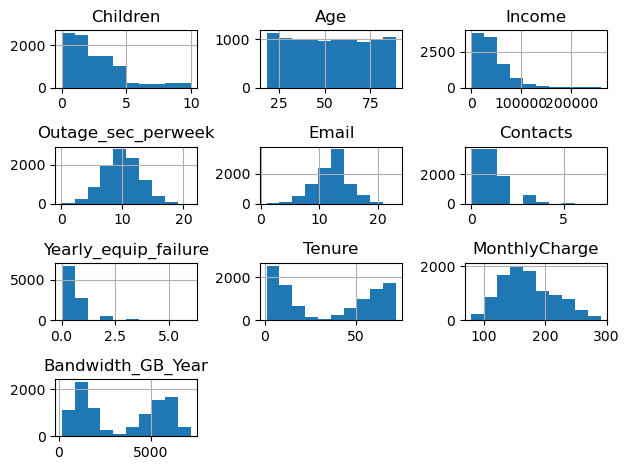

In [113]:
# Create histograms of continuous variables
df_churn[['Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email','Contacts', 'Yearly_equip_failure', 'Tenure', 
          'MonthlyCharge','Bandwidth_GB_Year']].hist()
plt.tight_layout()

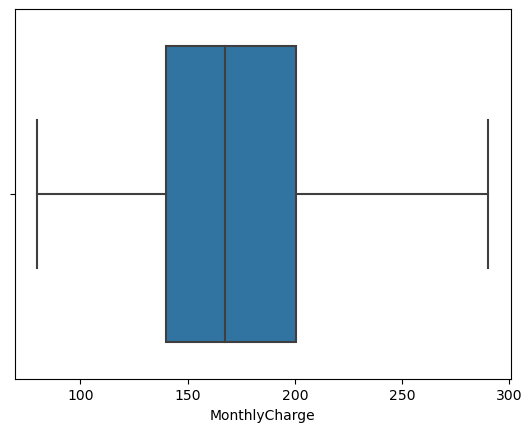

In [114]:
# Display boxplots for continuous variables MonthlyCharge, Bandwidth_GB_Year and Tenure
sns.boxplot('MonthlyCharge', data = df_churn)
plt.show()

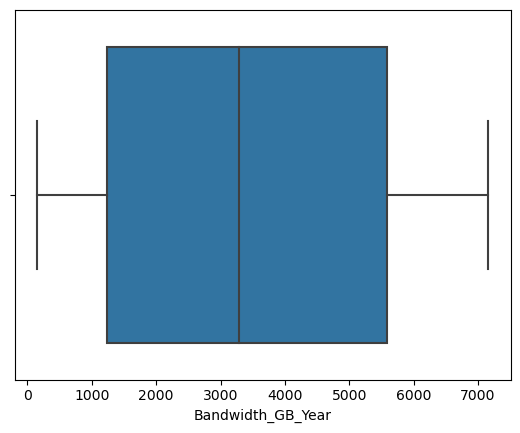

In [115]:
sns.boxplot('Bandwidth_GB_Year', data = df_churn)
plt.show()

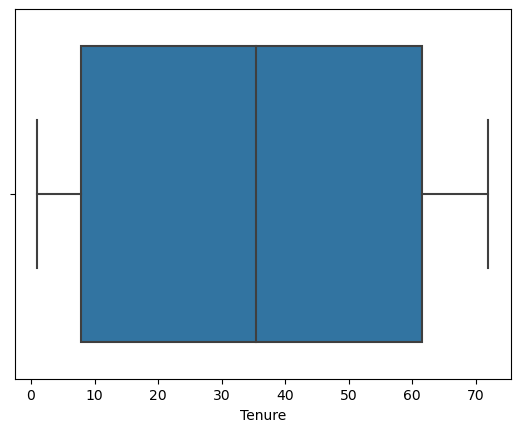

In [116]:
sns.boxplot('Tenure', data = df_churn)
plt.show()

###  Bivariate Statistics

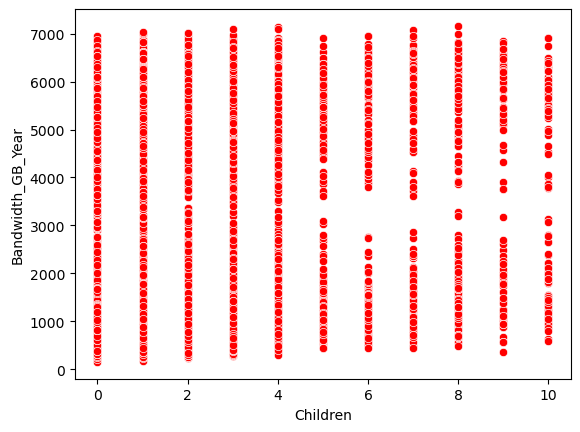

In [117]:
# Display the scatterplot between target & independent variables
sns.scatterplot(x=df_churn['Children'], y=df_churn['Bandwidth_GB_Year'], color='red')
plt.show();


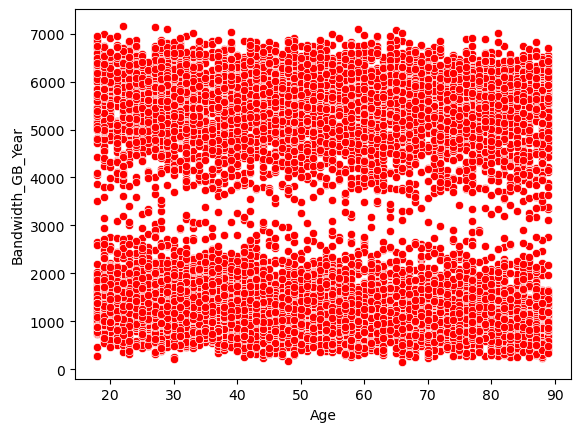

In [118]:
 sns.scatterplot(x=df_churn['Age'], y=df_churn['Bandwidth_GB_Year'], color='red')
plt.show();

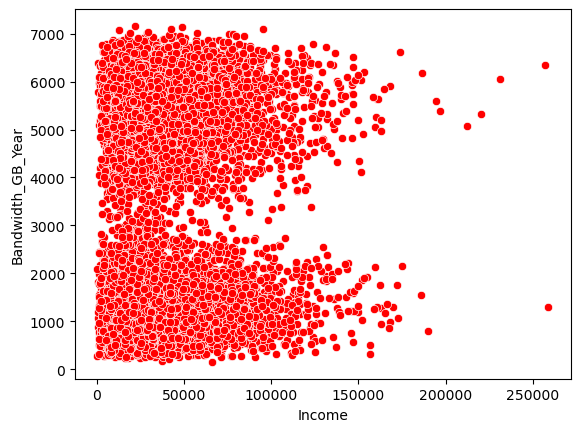

In [119]:
sns.scatterplot(x=df_churn['Income'], y=df_churn['Bandwidth_GB_Year'], color='red')
plt.show();

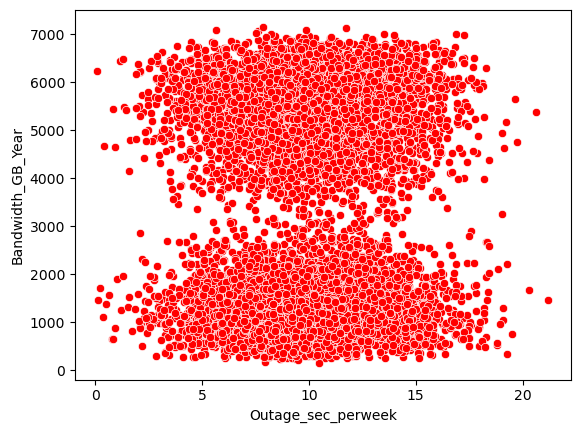

In [120]:
sns.scatterplot(x=df_churn['Outage_sec_perweek'], y=df_churn['Bandwidth_GB_Year'], color='red')
plt.show();

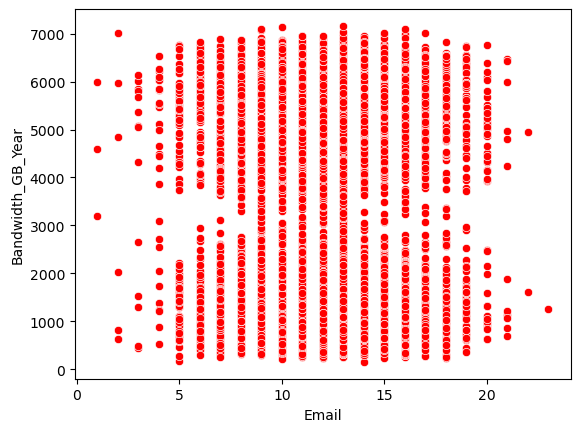

In [121]:
sns.scatterplot(x=df_churn['Email'], y=df_churn['Bandwidth_GB_Year'], color='red')
plt.show()

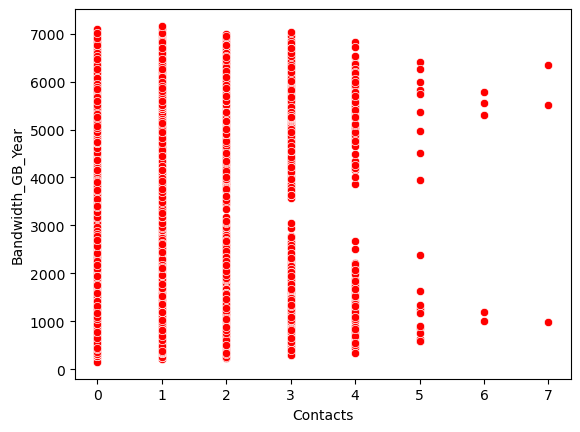

In [122]:
sns.scatterplot(x=df_churn['Contacts'], y=df_churn['Bandwidth_GB_Year'], color='red')
plt.show();

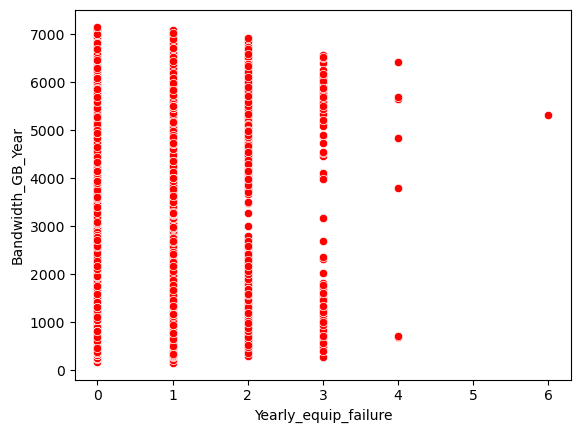

In [123]:
sns.scatterplot(x=df_churn['Yearly_equip_failure'], y=df_churn['Bandwidth_GB_Year'], color='red')
plt.show();


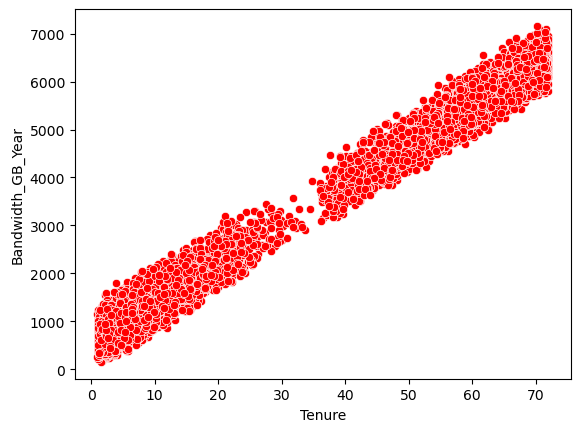

In [124]:
sns.scatterplot(x=df_churn['Tenure'], y=df_churn['Bandwidth_GB_Year'], color='red')
plt.show();

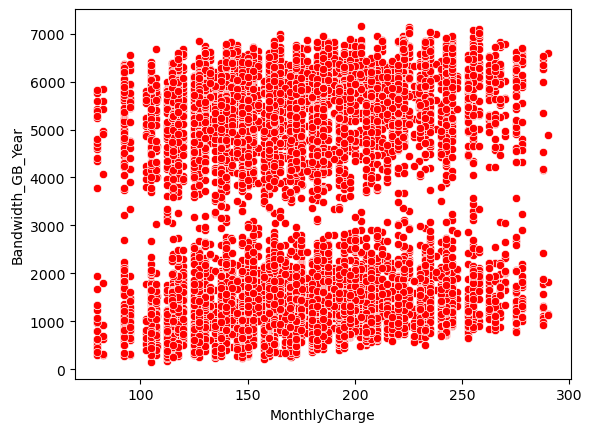

In [125]:
sns.scatterplot(x=df_churn['MonthlyCharge'], y=df_churn['Bandwidth_GB_Year'], color='red')
plt.show();


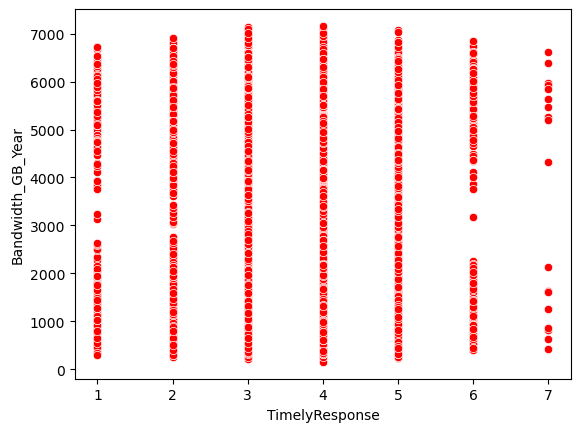

In [126]:
sns.scatterplot(x=df_churn['TimelyResponse'], y=df_churn['Bandwidth_GB_Year'], color='red')
plt.show();


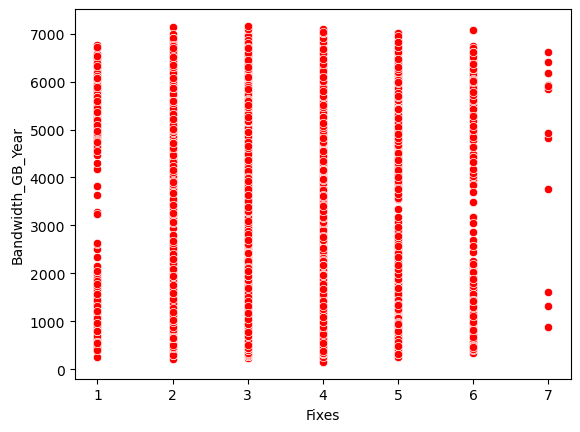

In [127]:
sns.scatterplot(x=df_churn['Fixes'], y=df_churn['Bandwidth_GB_Year'], color='red')
plt.show();

### C5. Prepared Dataset:

In [128]:
#Save prepared dataset as new files.
df_churn.to_csv('prepared_churn.csv')

In [129]:
# load the dataset
df = pd.read_csv('prepared_churn.csv')

In [130]:
#list the columns
df.columns

Index(['Unnamed: 0', 'Children', 'Age', 'Income', 'Outage_sec_perweek',
       'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'TimelyResponse', 'Fixes', 'Replacements',
       'Reliability', 'Options', 'Respectfulness', 'Courteous', 'Listening',
       'DummyGender', 'DummyChurn', 'DummyTechie', 'DummyContract',
       'DummyPort_modem', 'DummyTablet', 'DummyInternetService', 'DummyPhone',
       'DummyMultiple', 'DummyOnlineSecurity', 'DummyOnlineBackup',
       'DummyDeviceProtection', 'DummyTechSupport', 'DummyStreamingTV',
       'DummyPaperlessBilling'],
      dtype='object')

In [131]:
# Display the dimension of dataframe
df.shape

(10000, 34)

## Part IV: Model Comparison and Analysis

### D1. Initial Model:

In [132]:
# Construct an initial multiple regression model from all predictors that were identified in Part C2
df['intercept'] = 1
lm = sm.OLS(df['Bandwidth_GB_Year'], df[['intercept','Children','Age','Income','Outage_sec_perweek','Email','Contacts',
                                               'Yearly_equip_failure','Tenure','MonthlyCharge','TimelyResponse', 'Fixes',
                                               'Replacements','Reliability','Options','Respectfulness','Courteous','Listening']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 5.329e+04
Date:                Tue, 31 Jan 2023   Prob (F-statistic):               0.00
Time:                        18:23:23   Log-Likelihood:                -68489.
No. Observations:               10000   AIC:                         1.370e+05
Df Residuals:                    9982   BIC:                         1.371e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
intercept               95.8754     26.146      3.667      0.000      44.624     147.127
Children                30.9275      1.065     29.050      0.000      28.841      33.014
Age                     -3.3206      0.110    -30.065      0.000      -3.537      -3.104
Income                9.976e-05    8.1e-05      1.231      0.218   -5.91e-05       0.000
Outage_sec_perweek      -0.3501      0.768     -0.456      0.649      -1.856       1.156
Email                   -0.2792      0.755     -0.370      0.712      -1.759       1.201
Contacts                 2.9707      2.312      1.285      0.199      -1.562       7.503
Yearly_equip_failure     0.9080      3.593      0.253      0.801      -6.136       7.952
Tenure                  82.0113      0.086    948.882      0.000      81.842      82.181
MonthlyCharge            3.2768      0.053     61.585      0.000       3.173       3.381
TimelyResponse          -8.8961      3.271     -2.720      0.007     -15.308      -2.484
Fixes                    3.4660      3.064      1.131      0.258      -2.541       9.473
Replacements            -0.1771      2.812     -0.063      0.950      -5.690       5.335
Reliability             -0.2697      2.515     -0.107      0.915      -5.199       4.659
Options                  2.7199      2.611      1.042      0.298      -2.398       7.838
Respectfulness           1.7157      2.689      0.638      0.523      -3.554       6.986
Courteous               -1.3482      2.543     -0.530      0.596      -6.333       3.637
Listening                5.7844      2.420      2.390      0.017       1.040      10.529
==============================================================================
Omnibus:                    12280.983   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              968.853
Skew:                           0.449   Prob(JB):                    4.13e-211
Kurtosis:                       1.768   Cond. No.                     5.60e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.6e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [133]:
# Model including all encoded categorical dummy variables.
df['intercept'] = 1
lm_dummy = sm.OLS(df['Bandwidth_GB_Year'], df[['intercept','Children','Age','Income','Outage_sec_perweek','Email','Contacts',
                                               'Yearly_equip_failure','DummyTechie','DummyContract','DummyPort_modem',
                                               'DummyTablet','DummyInternetService', 'DummyPhone','DummyMultiple',
                                               'DummyOnlineSecurity','DummyOnlineBackup', 'DummyDeviceProtection',
                                               'DummyTechSupport', 'DummyStreamingTV','DummyPaperlessBilling','Tenure',
                                               'MonthlyCharge','TimelyResponse', 'Fixes','Replacements','Reliability',
                                               'Options','Respectfulness','Courteous','Listening']])
results1 = lm_dummy.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 8.675e+04
Date:                Tue, 31 Jan 2023   Prob (F-statistic):               0.00
Time:                        18:23:36   Log-Likelihood:                -63241.
No. Observations:               10000   AIC:                         1.265e+05
Df Residuals:                    9969   BIC:                         1.268e+05
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
intercept                33.1742     16.379      2.025      0.043       1.069      65.280
Children                 30.4177      0.631     48.226      0.000      29.181      31.654
Age                      -3.3153      0.065    -50.671      0.000      -3.444      -3.187
Income                  9.27e-06    4.8e-05      0.193      0.847   -8.48e-05       0.000
Outage_sec_perweek       -0.5259      0.455     -1.156      0.248      -1.418       0.366
Email                     0.1812      0.448      0.405      0.686      -0.696       1.058
Contacts                  2.1263      1.370      1.552      0.121      -0.559       4.811
Yearly_equip_failure      1.2859      2.129      0.604      0.546      -2.887       5.459
DummyTechie               0.6193      3.621      0.171      0.864      -6.478       7.717
DummyContract             3.9328      3.151      1.248      0.212      -2.244      10.110
DummyPort_modem           0.4710      2.707      0.174      0.862      -4.835       5.777
DummyTablet              -1.9813      2.959     -0.670      0.503      -7.781       3.819
DummyInternetService   -373.7111      2.980   -125.411      0.000    -379.552    -367.870
DummyPhone               -2.1515      4.658     -0.462      0.644     -11.282       6.979
DummyMultiple           -76.0773      3.153    -24.130      0.000     -82.257     -69.897
DummyOnlineSecurity      67.4949      2.830     23.850      0.000      61.948      73.042
DummyOnlineBackup       -12.6597      2.931     -4.319      0.000     -18.406      -6.914
DummyDeviceProtection    24.8879      2.807      8.867      0.000      19.386      30.390
DummyTechSupport        -52.5816      2.857    -18.405      0.000     -58.182     -46.981
DummyStreamingTV         30.4799      3.372      9.039      0.000      23.870      37.090
DummyPaperlessBilling    -2.6415      2.752     -0.960      0.337      -8.035       2.752
Tenure                   81.9913      0.051   1600.655      0.000      81.891      82.092
MonthlyCharge             4.7092      0.048     97.416      0.000       4.614       4.804
TimelyResponse           -1.4340      1.939     -0.739      0.460      -5.236       2.368
Fixes                     1.6837      1.817      0.927      0.354      -1.878       5.245
Replacements             -2.4128      1.666     -1.448      0.148      -5.679       0.853
Reliability              -1.5594      1.489     -1.047      0.295      -4.479       1.360
Options                   0.5285      1.547      0.342      0.733      -2.504       3.561
Respectfulness            1.2322      1.593      0.774      0.439      -1.890       4.354
Courteous                 0.4649      1.507      0.308      0.758      -2.490       3.419
Listening                 3.1708      1.434      2.212      0.027       0.361       5.981
=======================

#### Initial Multiple Linear Regression Model
With 30 indpendent variables (17 continuous & 13 categorical): 
y = 95.88 + 30.92 * Children - 3.32 * Age + 0.00 * Income - 0.35 * Outage_sec_perweek - 0.27 * Email + 2.97 * Contacts +
0.90 * Yearly_equip_failure + 0.62 * DummyTechie + 3.93 * DummyContract + 0.47 * DummyPort_modem - 1.98 * DummyTablet - 373.71 * DummyInternetService - 2.15 * DummyPhone - 76.08 * DummyMultiple + 67.49 * DummyOnlineSecurity - 12.66 * DummyOnlineBackup + 24.89 * DummyDeviceProtection - 52.58 * DummyTechSupport + 30.48 * DummyStreamingTV - 2.64 * DummyPaperlessBilling + 82.01 * Tenure + 3.28 * MonthlyCharge - 8.9 * TimelyResponse + 3.47 * Fixes - 0.18 * Replacements - 0.27 * Reliability + 2.72 * Options + 1.72 * Respectfulness - 1.35 * Courteous + 5.78 * Listening

The value of R2 is 0.989. So, 99% of the variation is explained by this model. The condition number is large which might suggest strong multicolinnearity. So we don't need all the variables to explain the variance. So now i display the heatmap for bivariate analysis to reduce variables.

### D2. Justification of Model Reduction:

In [134]:
# Create dataframe for heatmap bivariate analysis of correlation without some demographic, contacting-customer and options variables
churn_bivariate = df[['Bandwidth_GB_Year', 'Children','Tenure', 'TimelyResponse', 'Fixes',
                            'Replacements', 'Respectfulness','Courteous', 'Listening']]

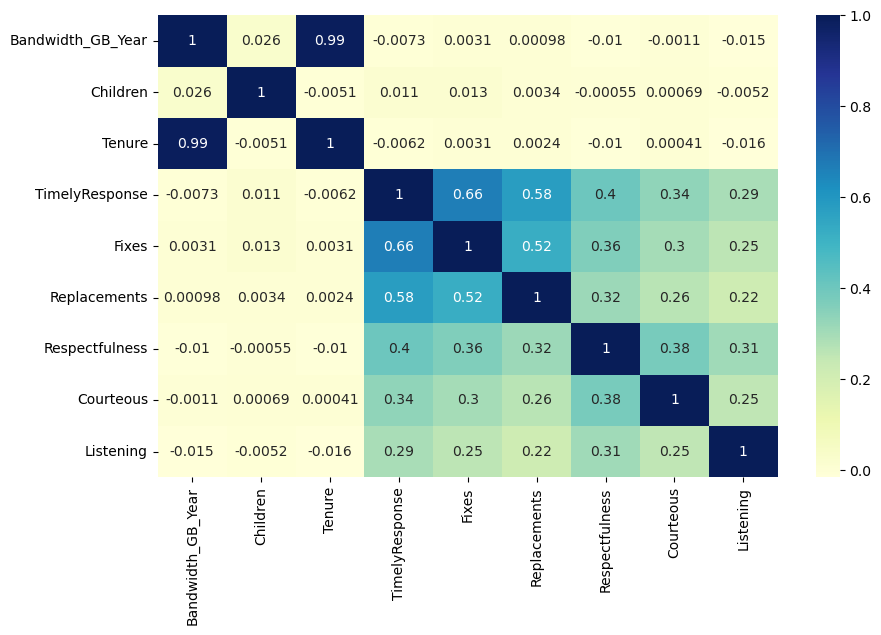

In [135]:
# Display heatmaps for bivariate analysis of correlation
plt.figure(figsize=(10,6))
sns.heatmap(churn_bivariate.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [136]:
# Construct multiple regression model without some demographic, contacting-customer and options variables
df['intercept'] = 1
lm = sm.OLS(df['Bandwidth_GB_Year'], df[['intercept','Children','Tenure','TimelyResponse', 'Fixes',
                                               'Replacements','Respectfulness','Courteous','Listening']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                 7.686e+04
Date:                Tue, 31 Jan 2023   Prob (F-statistic):               0.00
Time:                        18:24:50   Log-Likelihood:                -70405.
No. Observations:               10000   AIC:                         1.408e+05
Df Residuals:                    9991   BIC:                         1.409e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept        504.3874     15.010     33.604      0.000     474.965     533.810
Children          31.1984      1.288     24.227      0.000      28.674      33.723
Tenure            81.9537      0.105    783.679      0.000      81.749      82.159
TimelyResponse    -3.8767      3.933     -0.986      0.324     -11.586       3.833
Fixes              2.7015      3.700      0.730      0.465      -4.550       9.953
Replacements      -2.5313      3.398     -0.745      0.456      -9.193       4.130
Respectfulness     0.6722      3.121      0.215      0.829      -5.446       6.790
Courteous         -3.4216      3.007     -1.138      0.255      -9.316       2.473
Listening          4.5255      2.903      1.559      0.119      -1.165      10.216
==============================================================================
Omnibus:                      377.492   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              294.385
Skew:                           0.335   Prob(JB):                     1.19e-64
Kurtosis:                       2.491   Cond. No.                         241.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- It appears that Tenure is the predictor for most of the variance.It clearly shows that there is a positive linear relationship between tenure and bandwidth.
- Next, I will run a multiple linear regression model on those variables with p - value0.05 or less. 
- So, the reduced regression model will include the continuous variable tenure, the categorical variable children and the ordinal categorical independent variables fixes and replacements.

### D3. Reduced Multiple Regression Model:

In [137]:
# Create reduced OLS multiple regression.
df['intercept'] = 1
lm_reduced = sm.OLS(df['Bandwidth_GB_Year'],df[['Children', 'Tenure', 'TimelyResponse', 'Fixes', 'Replacements', 
                                                'Courteous', 'Listening', 'intercept']])
results = lm_reduced.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                 8.784e+04
Date:                Tue, 31 Jan 2023   Prob (F-statistic):               0.00
Time:                        18:25:10   Log-Likelihood:                -70405.
No. Observations:               10000   AIC:                         1.408e+05
Df Residuals:                    9992   BIC:                         1.409e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Children          31.1973      1.288     24.228      0.000      28.673      33.721
Tenure            81.9535      0.105    783.741      0.000      81.749      82.159
TimelyResponse    -3.7644      3.898     -0.966      0.334     -11.405       3.877
Fixes              2.7725      3.685      0.752      0.452      -4.450       9.995
Replacements      -2.4848      3.391     -0.733      0.464      -9.132       4.163
Courteous         -3.2637      2.916     -1.119      0.263      -8.980       2.453
Listening          4.6325      2.860      1.620      0.105      -0.974      10.239
intercept        505.0156     14.723     34.301      0.000     476.156     533.876
==============================================================================
Omnibus:                      377.577   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              294.537
Skew:                           0.335   Prob(JB):                     1.10e-64
Kurtosis:                       2.491   Cond. No.                         236.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

    - After removing all the other predictor variables, the model still explains 98% of the variance.

- Reduced Multiple Linear Regression Model

y = 506.77 + 31.18 * Children + 81.95 * Tenure -3.77 * TimelyResponse + 2.77 * Fixes – 2.48 * Replacements - 3.26 * Courteous + 4.63 * Listening

### E1. Model Comparison:

- The logic of the variable selection technique

After running logistics regression model including all the dummy variables, it shows that the R-squared value = 0.996. So I took the variables with the p-value 0.05 or less as it is statistically significant to run the losgistic regression model. 
 
- Evaluation Metrics:

After removing the variables with p-value greater than 0.05, the R-squared value is 0.984 which is basically same between the two models. So our reduced model based on p-values did not increase our R-squared so therefore the goodness of fit is same between the two models.

In [138]:
# Display residual plot
df = pd.read_csv('prepared_churn.csv')
df['intercept'] = 1
residuals = df['Bandwidth_GB_Year'] - results.predict(df[['Children', 'Tenure', 'TimelyResponse', 'Fixes', 'Replacements', 
                                                'Courteous', 'Listening', 'intercept']])


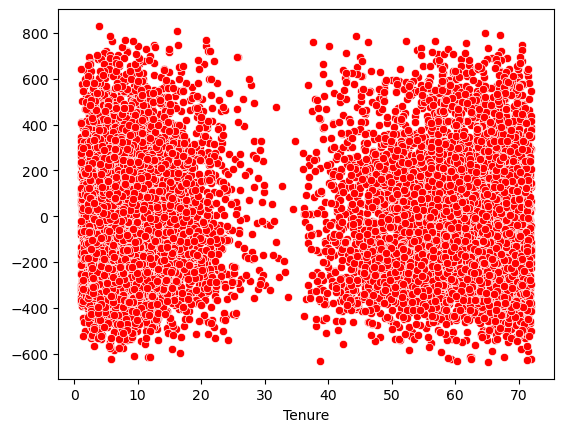

In [139]:
sns.scatterplot(x = df['Tenure'],y = residuals, color='red')
plt.show()

In [140]:
# Display Residual Standard Error
rse = np.sqrt(results.mse_resid)
print("RSE: ", rse)

RSE:  276.4290395836073


### E2. Output and Calculations:
Output and calculation above.

### E3. Code:
All code for analysis are above.

## Part V: Data Summary and Implications

### F1. Results:
- The final multiple regression equation with independent variables:
 y = 506.77 + 31.18 * Children + 81.95 * Tenure -3.77 * TimelyResponse + 2.77 * Fixes – 2.48 * Replacements - 3.26 * Courteous + 4.63 * Listening
  

- Interpretation of coefficients of the statistically significant variables of the model
   - Children –  For one unit increase in children is associated with 31.18 units increase in Bandwidth, keeping all things constant.
   - Tenure – For one unit increase in Tenure is associated with 81.95 units increase in Bandwidth, keeping all things constant.Keeping all things constant.
   - TimelyResponse - For one unit increase in TimelyResponse is associated with 3.77 units decrease in Bandwidth, keeping all things constant.
   - Fixes – For one unit increase in Fixes is associated with 2.77 units decrease in Bandwidth, keeping all things constant.
   - Replacements – For one unit increase in Replacements is associated with 2.48 units decrease in Bandwidth, keeping all things constant.
   - Courteous -  For one unit increase in Courteous is associated with 3.26 units decrease in Bandwidth, keeping all things constant.
   - Listening - For one unit increase in Listening is associated with 4.63 units increase in Bandwidth, keeping all things constant.


- The statistical and practical significance of the model:
The P-values for Children & Tenure are statistically significant at 0.00, while p-values for TimelyResponse, Fixes, replacements, Courteous, Listening were 0.334, 0.452, 0.464, 0.263 and 0.105 respectively. The model is practically significant because the p-values for all variables are below 0.05.

- Even though the regression model has R² = 98%, which is strong, the limitations of this analysis are that we don't know the time frame of this dataset. I also think that we do not have enough data and more past data is needed for predicting how many customers are at high risk of churn. To provide clear understanding, more investigation is required. Moreover, using the incomplete dataset falsely concludes that a correlation is causation. There are a few limitations that need to be satisfied. These are:

    - Linearity
    - Constant Error Variance
    - Independent Error Terms or No autocorrelation of the residuals
    - Normal Errors
    - Multicollinearity
    - Exogeneity or Omitted Variable Bias (Tavish Aggarwal, June 2020)

## Part VI: Demonstration

### G. Video:


### H. Sources for Third-Party Code:
Zach. (November 22, 2021).How to Perform Bivariate Analysis in Python (With Examples). Retrieved from

https://www.statology.org/bivariate-analysis-in-python/

Linear Regression: Residual Standard Error in Python. (February, 2022). Retrieved from https://www.datascienceconcepts.com/tutorials/python-programming-language/linear-regression-residual-standard-error-in-python/

### I. Sources:
An introduction to seaborn. An introduction to seaborn - seaborn 0.11.2 documentation. (n.d.). Retrieved November 20, 2021, from 

https://seaborn.pydata.org/introduction.html 

Tavish Aggarwal. (June, 2020). Limitations of the Linear Regression. Retrieved from https://www.techladder.in/article/limitations-linear-regression